### Dataset Description

Create some models to predict whether an employee stayed with the company or not.


Description: The "HR_comma_sep.csv" file contains data about employees that have left 
and still remain with a company. The variables are described as follows:

* satisfaction_level - Scale (0 to 1) 1 being highly satisfied
* last_evaluation - Scale (0 to 1) 1 being a high performance rating
* number_project - The number of projects an employee is assigned
* average_monthly_hours - The average amount of hours an employee works each month
* work_accident - (1) was in accident, (0) was not in accident
* promotion_last_5years - (1) received a promotion in the last 5 years, (0) did not receive promotion
* sales - the department the employee belongs
* salary - low, medium, or high
* left - (1) the employee left the company, (0) the employee did not leave the company

In [ ]:
# import libraries
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the 'HR_comma_sep.csv' dataset from local csv file
df = pd.read_csv('HR_comma_sep.csv')

#### Get familiar with the data
Get to understand the dataset, the different variables and their data types


In [5]:
# view only the first 8 rows
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low


In [6]:
# view statistical data summary
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#view the type of dataset 
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_monthly_hours      int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [11]:
# Rename column "sales" to "department", then show the first 5 rows
df.rename(columns={'sales':'department'}, inplace=True)
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# View only the satisfaction level data
df.satisfaction_level

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
5        0.41
6        0.10
7        0.92
8        0.89
9        0.42
10       0.45
11       0.11
12       0.84
13       0.41
14       0.36
15       0.38
16       0.45
17       0.78
18       0.45
19       0.76
20       0.11
21       0.38
22       0.09
23       0.46
24       0.40
25       0.89
26       0.82
27       0.40
28       0.41
29       0.38
         ... 
14969    0.43
14970    0.78
14971    0.39
14972    0.11
14973    0.36
14974    0.36
14975    0.10
14976    0.40
14977    0.81
14978    0.40
14979    0.09
14980    0.76
14981    0.73
14982    0.38
14983    0.72
14984    0.40
14985    0.91
14986    0.85
14987    0.90
14988    0.46
14989    0.43
14990    0.89
14991    0.09
14992    0.40
14993    0.76
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction_level, Length: 14999, dtype: float64

In [14]:
# Show records that had average monthly hours greater than 309
df_hr309 = df.query('average_monthly_hours > 309')
df_hr309

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
566,0.11,0.79,7,310,4,0,1,0,hr,low
803,0.10,0.77,6,310,4,0,1,0,technical,medium
809,0.11,0.97,7,310,4,0,1,0,support,medium
1059,0.70,0.93,2,310,3,0,1,0,product_mng,low
1228,0.10,0.85,7,310,5,0,1,0,marketing,low
1482,0.09,0.77,6,310,4,0,1,0,hr,low
1545,0.10,0.78,6,310,4,0,1,0,sales,medium
1578,0.10,0.96,6,310,5,0,1,0,support,low
1596,0.36,0.48,5,310,3,0,1,0,product_mng,medium
1717,0.11,0.96,6,310,4,0,1,0,technical,low


### Visualization
Follow the comments to create some graph and answer 

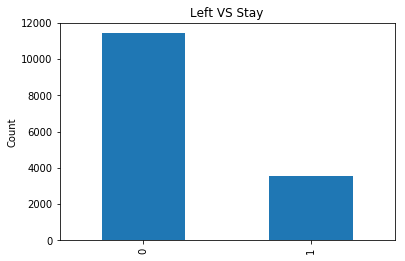

In [19]:
# create a bar chart to show the count of left vs not left. Give the chart a title "Left VS Stay" and a Y label "Count"
# are there more records of left or stay?
df['left'].value_counts().plot(kind='bar')
plt.title('Left VS Stay')
plt.ylabel('Count')
plt.show()

# There are many more records of people who stayed rather than left. 

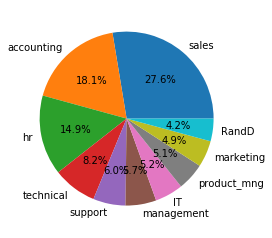

In [20]:
# create a pie chart that shows the percentage of departments
plt.pie(df['department'].value_counts(), labels=df.department.unique(),autopct='%.1f%%')
plt.show()

# what is the second largest department?
# Accounting is the second largest department with 18.1% of the employees working there

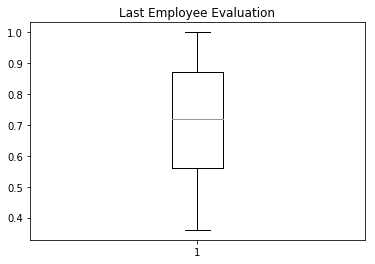

In [18]:
#Create a boxplot of last employee evaluation entitled "Last Employee Evaluation"
# boxplot
plt.boxplot(df.last_evaluation)
plt.title('Last Employee Evaluation')
plt.show()

# What is the approximate median score (the middle line)
# The Median score is approximately 0.72

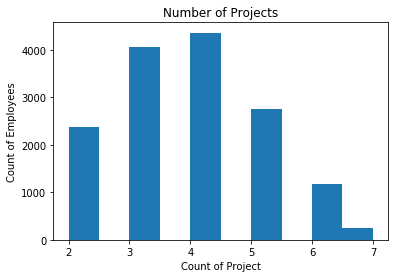

In [22]:
# Create a histogram to show the number of project. Give it a title "Number of Projects", a X lable "Count of Project", and
# a Y lable of "Count of Employees"
# how many projects do most people have?
plt.hist(df.number_project)
plt.xlabel('Count of Project')
plt.ylabel('Count of Employees')
plt.title('Number of Projects')
plt.show()

In [23]:
# create a cross table to compare salary and left
# what is the number of people that have low salary and have left? 
pd.crosstab(df.salary, df.left, margins=True)

# There are 2172 people with low salaries that have left

left,0,1,All
salary,,,
high,1155,82,1237
low,5144,2172,7316
medium,5129,1317,6446
All,11428,3571,14999


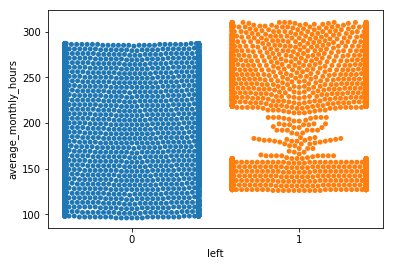

<Figure size 1872x1368 with 0 Axes>

In [25]:
# Create a swarmplot to compare average_monthly_hours and left.
# swarmplot is a categorical scatterplot with non-overlapping points, which makes the graph more readable and insighful.
# Try average_monthly_hours on x axis and left on y axis first, then switch to see which way makes more sense
# this might take a few minutes to run...

# what is one of the potential reasons that makes people leave the company?
sns.swarmplot(y=df.average_monthly_hours, x= df.left, data=df, linewidth= 0)
plt.figure(figsize=(26,19))
plt.show()

# The data suggest that required monthly hours could be a potential reason for employees leaving the company.   